In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from readData import *
from nearNeighbors import *
from localBKG import *
from scipy import stats
from bestBkg import *
from astropy import stats
import healpy as hp

In [2]:
# Reads in data files for use in readData.py

hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
hdulist4 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr5-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010.fits') # this is one sweep file of the DECaLS data


SpecObj_data = hdulist[1].data
SDSS_data = hdulist2[1].data
DECaLS_data1 = hdulist3[1].data
DECaLS_data2 = hdulist4[1].data

id_ALL1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gdepth_LRG1, rdepth_LRG1, zdepth_LRG1, gdepth_BKG1, rdepth_BKG1, zdepth_BKG1, gobs_LRG1, robs_LRG1, zobs_LRG1, gobs_BKG1, robs_BKG1, zobs_BKG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, plate_LRG1, tile_LRG1, specobjid_LRG1, objid_LRG1, brickid_LRG1 = readData(SpecObj_data, SDSS_data, DECaLS_data1)
id_ALL2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gdepth_LRG2, rdepth_LRG2, zdepth_LRG2, gdepth_BKG2, rdepth_BKG2, zdepth_BKG2, gobs_LRG2, robs_LRG2, zobs_LRG2, gobs_BKG2, robs_BKG2, zobs_BKG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, plate_LRG2, tile_LRG2, specobjid_LRG2, objid_LRG2, brickid_LRG2 = readData(SpecObj_data, SDSS_data, DECaLS_data2)

print("end readdata")


length of sdss array:  4851200
length of lrg only array: 1406221
length of DECaLS targets in brick:  5182673
length of id_ALL:  5182673
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 2012
length of idcut: 5182673
length of idcut = 1 (is an LRG in DECaLS-only file): 1524
length of idcut = 0 (is not an LRG in DECaLS-only file): 5181149
length of z_lrg: 1524
length of sdss array:  4851200
length of lrg only array: 1406221
length of DECaLS targets in brick:  4008392
length of id_ALL:  4008392
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 2012
length of idcut: 4008392
length of idcut = 1 (is an LRG in DECaLS-only file): 488
length of idcut = 0 (is not an LRG in DECaLS-only file): 4007904
length of z_lrg: 488
end readdata


In [3]:
ra = np.concatenate([ra_LRG1, ra_LRG2, ra_BKG1, ra_BKG2])
dec = np.concatenate([dec_LRG1, dec_LRG2, dec_BKG1, dec_BKG2])
z_LRG = np.concatenate([z_LRG1, z_LRG2])

gmag_LRG1 = 22.5 - 2.5 * np.log10(gflux_LRG1)
gmag_LRG2 = 22.5 - 2.5 * np.log10(gflux_LRG2)
rmag_LRG1 = 22.5 - 2.5 * np.log10(rflux_LRG1)
rmag_LRG2 = 22.5 - 2.5 * np.log10(rflux_LRG2)
zmag_LRG1 = 22.5 - 2.5 * np.log10(zflux_LRG1)
zmag_LRG2 = 22.5 - 2.5 * np.log10(zflux_LRG2)


# calculate BKG magnitudes

gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1)
gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2)
rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1)
rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2)
zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1)
zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2)

gmag = np.concatenate([gmag_LRG1, gmag_LRG2, gmag_BKG1, gmag_BKG2])
rmag = np.concatenate([rmag_LRG1, rmag_LRG2, rmag_BKG1, rmag_BKG2])
zmag = np.concatenate([zmag_LRG1, zmag_LRG2, zmag_BKG1, zmag_BKG2])


length phi:  992440
pixnums:  [8076271 8098117 8098129 ... 8099726 8099745 8099745]
8076271
length pixnums:  992440


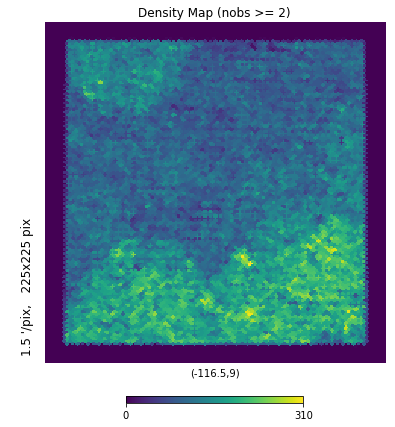

In [4]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# ra_cut = ra[np.where(zmag <= 21.5)]
# dec_cut = dec[np.where(zmag <= 21.5)]

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))

print('length phi: ', len(phi))
# Convert angles theta and phi to pixel numbers
pixnums = hp.ang2pix(nside, theta, phi, nest=True)
print('pixnums: ', pixnums)
print(pixnums[0])
print('length pixnums: ', len(pixnums))


# Create a HEALPix map from pix
mapp = np.bincount(pixnums, minlength=npixel)
# print('map where ne 0: ', mapp[np.where(mapp > 0)])
# print('length map == 0: ', len(mapp[np.where(mapp == 0)]))
# print('length map: ', len(mapp))

# masked_map = np.zeros(len(mapp))
# masked_map[(mapp == 0)] = 1

# m = hp.ma(mapp)
# m.mask = masked_map

# Plot mapp
hp.gnomview(mapp, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Density Map (nobs >= 2)')
plt.show()



[22.68347359 22.38355637 22.56268692 ... 23.5455513  20.50196648
 20.58319664]


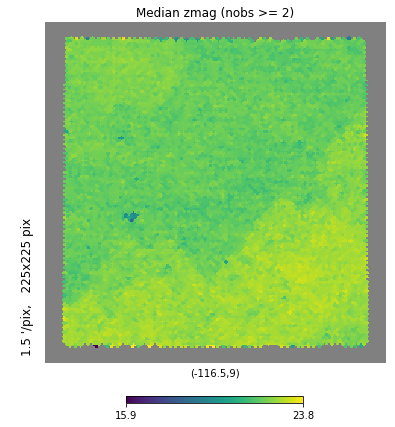

In [5]:
# This section maps various values of the galaxies into a HEALPix map so the result is basically a density map of
# galaxy properties. In this code the new maps are array_g, array_r, and array_z.

# returns indices that would sort the array pixnums
pixorder = np.argsort(pixnums)
# returns sorted unique values of pixnums, indices to reconstruct the original array from the unique array,
# and the number of times each unique value comes up in the original array
pixels, pixinverse, pixcnts = np.unique(pixnums, return_inverse=True, return_counts=True)

# print(len(pixnums))
# print('----')
# print(pixorder)
# print('----')
# print(len(pixels))
# print('----')
# print(pixcnts)
# inserts a zero in the zeroth index space, moving all other values down the line
pixcnts = np.insert(pixcnts, 0, 0)
# calculates the cumulative sum of the values in pixcnts
pixcnts = np.cumsum(pixcnts)
# print(pixcnts)

# This seems like a weird thing to do, but this is why: pixnums is an array of pixel numbers that correspond to a
# galaxy. There are many galaxies per pixel, so the individual pixnum will repeat. pixcnts is the number of times
# each unique value appears in pixnums. pixorder is the array of indices that would sort pixnums. The loop below makes
# a map of median values per pixel for any desired characteristic. In the loop, inds is the index array of galaxies
# that show up in a pixel (the pixnum values). It uses the range set by pixcnts to determine which index from
# pixorder is used. In the loop, pix is the pixel number inds belongs in.

array_g = np.full(npixel, -1.)
array_r = np.full(npixel, -1.)
array_z = np.full(npixel, -1.)
pix = []
for i in range(len(pixcnts)-1):
# for i in range(1):
    inds = pixorder[pixcnts[i]:pixcnts[i+1]]
#     print(inds)
    pix = pixnums[inds][0]
#     print(pix)
    array_z[pix] = np.median(zmag[inds])
    # array_g[pix] = -2.5*(np.log10(5. / np.sqrt(np.median(galdepth_g[inds]))) - 9.)
    # array_r[pix] = -2.5*(np.log10(5. / np.sqrt(np.median(galdepth_r[inds]))) - 9.)
    # array_z[pix] = -2.5*(np.log10(5. / np.sqrt(np.median(galdepth_z[inds]))) - 9.)

print(array_z[array_z != -1])
# # masked_map_g = np.zeros(len(array_g))
# # masked_map_g[(array_g == -1.)] = 1
# #
# # mg = hp.ma(array_g)
# # mg.mask = masked_map_g
# #
# # masked_map_r = np.zeros(len(array_r))
# # masked_map_r[(array_r == -1.)] = 1
# #
# # mr = hp.ma(array_r)
# # mr.mask = masked_map_r

masked_map_z = np.zeros(len(array_z))
masked_map_z[(array_z == -1.)] = 1

mz = hp.ma(array_z)
mz.mask = masked_map_z

# # hp.gnomview(mg, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Median gmag (nobs >= 2)')
# # plt.show()
# #
# # hp.gnomview(mr, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Median rmag (nobs >= 2)')
# # plt.show()

hp.gnomview(mz, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Median zmag (nobs >= 2)')
plt.show()


sorted array;  [15.90093994 18.47089386 19.23069954 ... 23.67066193 23.73283386
 23.79045105]
nz1 =  774.0
percentile:  21.39742598075867
my way:  774.0
<class 'numpy.float64'>
22.746795654296875


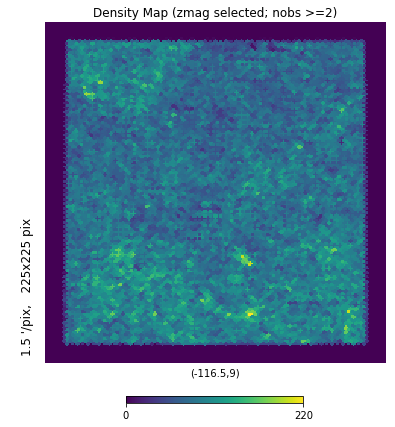

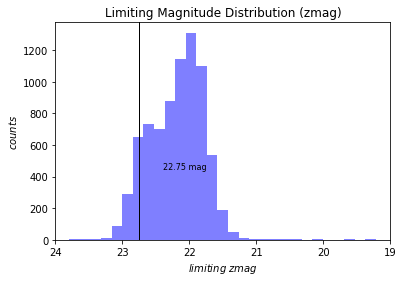

In [11]:
# This section isolates the top 2 percent brightest sources in zmag. array_z is a map of median values for zmag for
# each HEALPix pixel.

# Attempt to isolate only the top 2 percent of galaxies in whatever galaxy characteristic I'm looking at

# sorted_array_g = np.sort(array_g[np.where(array_g != -1.)])
# reverse_sorted_g = sorted_array_g[::-1]
# cutlen_g = len(reverse_sorted_g) * 0.98
# ng = np.rint(cutlen_g)
#
# sorted_array_r = np.sort(array_r[np.where(array_r != -1.)])
# reverse_sorted_r = sorted_array_r[::-1]
# cutlen_r = len(reverse_sorted_r) * 0.98
# nr = np.rint(cutlen_r)
#

# sorts array_z for values that do not equal -1 (-1 is the value representing an empty pixel); goes from brightest to
# faintest 
sorted_array_z = np.sort(array_z[np.where(array_z != -1.)])
print('sorted array; ', sorted_array_z)
# because smaller magnitudes are brighter, reverse sort the array. I guess you don't have to do that but that's
# what I did. goes from faintest to brightest 
reverse_sorted_z = sorted_array_z[::-1]
# this multiplies the length of reverse_sorted_z by 0.98 to get the 2 percent brightest galaxies. cutlen_z is an
# index value and everything after this index value is in the 2 percent brightest galaxies. 
cutlen_z1 = len(reverse_sorted_z) * 0.10
# didn't realize the percentile function existed before now. This function comes up with a value that differs by
# 0.1 mag
cutlen_z2 = np.percentile(reverse_sorted_z, 0.98)
nz1 = np.rint(cutlen_z1)
print('nz1 = ', nz1)
print('percentile: ', cutlen_z2)
# print(reverse_sorted_z)
print('my way: ', cutlen_z1)
print(type(nz1))
print(reverse_sorted_z[int(nz1)])

ra98 = ra[np.where(zmag <= reverse_sorted_z[np.int64(nz1)])]
dec98 = dec[np.where(zmag <= reverse_sorted_z[np.int64(nz1)])]

theta98 = []
phi98 = []

for i in range(len(ra98)):
    theta98.append(np.radians(90. - dec98[i]))
    phi98.append(np.radians(ra98[i]))

# Convert angles theta and phi to pixel numbers
pixnums98 = hp.ang2pix(nside, theta98, phi98, nest=True)

# Create a HEALPix map from pix
density_map98 = np.bincount(pixnums98, minlength=npixel)

# masked_density = np.zeros(len(density_map98))
# masked_density[(density_map98 == -1.)] = 1
# md = hp.ma(density_map98)
# md.mask = masked_density

# Plot mapp
hp.gnomview(density_map98, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Density Map (zmag selected; nobs >=2)')
plt.show()

plt.title("Limiting Magnitude Distribution (zmag)")
plt.hist(array_z[np.where(array_z != -1.)], bins=50, color='blue', alpha=0.5)
plt.xlabel(r'$limiting$ $zmag$')
plt.ylabel(r'$counts$')
plt.xlim(19., 24.)
plt.gca().invert_xaxis()
plt.axvline(x=reverse_sorted_z[np.int64(nz1)], linewidth=1, color='black')
plt.text(22.4, 450, '{} mag'.format(np.around(reverse_sorted_z[np.int64(nz1)], decimals=2)), fontsize=8)
plt.show()
